# **1. IMPORT LIBRARY**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import randint
# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
# Imbalance data handling
from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from collections import Counter

# **2. LOAD DATASETS**

In [11]:
file_path = '/content/drive/MyDrive/Skripsi_21.11.4123_AliviaDA/Data_Balita_Desa_Mlese.xlsx'
df = pd.read_excel(file_path, sheet_name='Data_Balita_Desa_Mlese', header=0)
display(df)

,No,Nama Anak,Tanggal Lahir,Umur,Jenis Kelamin,Berat Badan Lahir (Kg),Nama Ibu,Desa,Dusun,Alamat,...,Tanggal Pengukuran,BB,TB,Z-Score BB/U,Z-Score TB/U,Z-Score BB/TB,Status BB/U,Status TB/U,Status BB/TB,Cara Ukur
0,1,KANISA GENDHIS AMELIA,10-01-2019,20,P,2.8,ATIKA WINDI HASTINI,MLESE,NGARAN,NGARAN,...,23-09-2020,10,80,0.50,-0.20,0.80,Normal,Normal,Gizi Baik,1
1,2,GHANIA FRADELLA LEENA,30-06-2019,14,P,3,RENANI PUJI ASTUTI,MLESE,NGARAN,NGARAN,...,23-09-2020,7.8,78,-0.80,0.50,-0.60,Normal,Normal,Gizi Baik,1
2,3,RAYYAN ALFARIZI PUTRA,19-07-2018,26,L,2.7,ANA JULIANTI,MLESE,NGARAN,NGARAN,...,23-09-2020,9.5,80,-1.20,-1.00,-0.50,Normal,Normal,Gizi Baik,1
3,4,FAUZAN ADHIMA,24-11-2017,33,L,2.7,ARINA FAUZANI,MLESE,NGARAN,NGARAN,...,23-09-2020,13.7,86,1.50,0.80,1.80,Normal,Normal,Resiko Gizi Lbh,1
4,5,REXZA ACELIN ATHA A,19-06-2017,39,L,3.1,NOVIANA SURYANI,MLESE,NGARAN,NGARAN,...,23-09-2020,15,93,1.80,1.20,2.20,Normal,Normal,Obesitas,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,1613,FAYOLLA CHAYRA NADHOFA,23-05-2020,47,P,"3,2",SARI DAMAYANTI,MLESE,SRAGON,SRAGON,...,16-05-2024,"11,4",94,-0.71,0.18,-0.18,Kurang,Normal,Gizi Kurang,2
1613,1614,AIRA FARAH NUR FITRIYAH,13-04-2020,49,P,"2,89",SRI HANDAYANI,MLESE,SRAGON,SRAGON,...,16-05-2024,"11,7","89,5",-0.60,-1.35,-0.53,Kurang,Sangat Pendek,Gizi Baik,2
1614,1615,ASKA AULIA,20-02-2020,50,P,2.4,ISTIQOMAH SETIYAWATI,MLESE,SRAGON,SRAGON,...,16-05-2024,"11,7",90,-2.77,-3.00,-2.20,Sangat kurang,Sangat Pendek,Gizi Kurang,2
1615,1616,ZAFRAN ALQHIFARI WIDADA,12-10-2019,55,L,2.3,HESTI HANDAYANI,MLESE,SRAGON,SRAGON,...,16-05-2024,"18,6",106,1.85,1.21,1.32,Normal,Normal,Gizi Baik,2


# **3. EDA**

In [12]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (1617, 22)


In [13]:
# --- 1.2. Cek Struktur Awal Dataset ---
print("\nInformasi Umum Dataset:")
print(df.info())


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      1617 non-null   int64  
 1   Nama Anak               1617 non-null   object 
 2   Tanggal Lahir           1617 non-null   object 
 3   Umur                    1617 non-null   int64  
 4   Jenis Kelamin           1617 non-null   object 
 5   Berat Badan Lahir (Kg)  1617 non-null   object 
 6   Nama Ibu                1617 non-null   object 
 7   Desa                    1617 non-null   object 
 8   Dusun                   1617 non-null   object 
 9   Alamat                  1617 non-null   object 
 10  RT                      1616 non-null   float64
 11  RW                      1615 non-null   float64
 12  Tanggal Pengukuran      1617 non-null   object 
 13  BB                      1617 non-null   object 
 14  TB             

In [14]:
# Cek nilai hilang
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
No                        0
Nama Anak                 0
Tanggal Lahir             0
Umur                      0
Jenis Kelamin             0
Berat Badan Lahir (Kg)    0
Nama Ibu                  0
Desa                      0
Dusun                     0
Alamat                    0
RT                        1
RW                        2
Tanggal Pengukuran        0
BB                        0
TB                        0
Z-Score BB/U              1
Z-Score TB/U              1
Z-Score BB/TB             2
Status BB/U               0
Status TB/U               1
Status BB/TB              0
Cara Ukur                 0
dtype: int64


In [16]:
# ============================================================
# NORMALISASI NAMA KOLOM (Menjaga Format Asli)
# ============================================================

# 1️⃣ Hilangkan spasi berlebih
df.columns = df.columns.str.strip()

# 2️⃣ Ubah ke Huruf Awal Kapital terlebih dahulu
df.columns = df.columns.str.title()

# 3️⃣ Tetapkan kolom yang HARUS huruf besar penuh
kolom_kapital_penuh = ['RT', 'RW', 'BB', 'TB']

# 4️⃣ Ganti kembali kolom z-score & status agar sama persis dengan format asli
mapping_kolom_asli = {
    'Z-Score Bb/U': 'Z-Score BB/U',
    'Z-Score Tb/U': 'Z-Score TB/U',
    'Z-Score Bb/Tb': 'Z-Score BB/TB',
    'Status Bb/U': 'Status BB/U',
    'Status Tb/U': 'Status TB/U',
    'Status Bb/Tb': 'Status BB/TB',
}

# 5️⃣ Terapkan perbaikan
df.rename(columns=mapping_kolom_asli, inplace=True)

# 6️⃣ Perbaiki RT, RW, BB, TB supaya huruf besar semua
df.columns = [
    col.upper() if col.upper() in kolom_kapital_penuh else col
    for col in df.columns
]

# 7️⃣ Cek hasil akhir
print("✅ Nama kolom setelah normalisasi:")
print(df.columns.tolist())

✅ Nama kolom setelah normalisasi:
['No', 'Nama Anak', 'Tanggal Lahir', 'Umur', 'Jenis Kelamin', 'Berat Badan Lahir (Kg)', 'Nama Ibu', 'Desa', 'Dusun', 'Alamat', 'RT', 'RW', 'Tanggal Pengukuran', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status BB/U', 'Status TB/U', 'Status BB/TB', 'Cara Ukur']


In [17]:
# Standarisasi nama kolom agar konsisten di seluruh dataset
col_map = {
    'BB': 'BB',
    'TB': 'TB',
    'Umur': 'Umur',
    'Jenis Kelamin': 'Jenis Kelamin',
    'Status BB/TB': 'Status BB/TB',
    'Status BB/U': 'Status BB/U',
    'Status TB/U': 'Status TB/U',
    'Z-Score BB/U': 'Z-Score BB/U',
    'Z-Score TB/U': 'Z-Score TB/U',
    'Z-Score BB/TB': 'Z-Score BB/TB',
    'Berat Badan Lahir (Kg)': 'Berat Badan Lahir (Kg)',
    'RT': 'RT',
    'RW': 'RW',
    'Cara Ukur': 'Cara Ukur',
    'Desa': 'Desa',
    'Dusun': 'Dusun'
}

# Rename kolom hanya jika ada di dataframe
for old, new in col_map.items():
    if old in df.columns and old != new:
        df.rename(columns={old: new}, inplace=True)

print("✅ Nama kolom berhasil dinormalisasi.")
print("Daftar kolom aktif:", df.columns.tolist())


✅ Nama kolom berhasil dinormalisasi.
Daftar kolom aktif: ['No', 'Nama Anak', 'Tanggal Lahir', 'Umur', 'Jenis Kelamin', 'Berat Badan Lahir (Kg)', 'Nama Ibu', 'Desa', 'Dusun', 'Alamat', 'RT', 'RW', 'Tanggal Pengukuran', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status BB/U', 'Status TB/U', 'Status BB/TB', 'Cara Ukur']


In [18]:
# Pastikan kolom numerik memiliki tipe data numerik (float)
numerik_cols = ['Umur', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB']

In [19]:
# Pastikan matplotlib tampil rapi
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

In [20]:
print("=== INFORMASI DATASET ===")
print(df.info())
print("\n=== STATISTIK DESKRIPTIF ===")
print(df.describe(include='all').T)

=== INFORMASI DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      1617 non-null   int64  
 1   Nama Anak               1617 non-null   object 
 2   Tanggal Lahir           1617 non-null   object 
 3   Umur                    1617 non-null   int64  
 4   Jenis Kelamin           1617 non-null   object 
 5   Berat Badan Lahir (Kg)  1617 non-null   object 
 6   Nama Ibu                1617 non-null   object 
 7   Desa                    1617 non-null   object 
 8   Dusun                   1617 non-null   object 
 9   Alamat                  1617 non-null   object 
 10  RT                      1616 non-null   float64
 11  RW                      1615 non-null   float64
 12  Tanggal Pengukuran      1617 non-null   object 
 13  BB                      1617 non-null   object 
 14  TB            

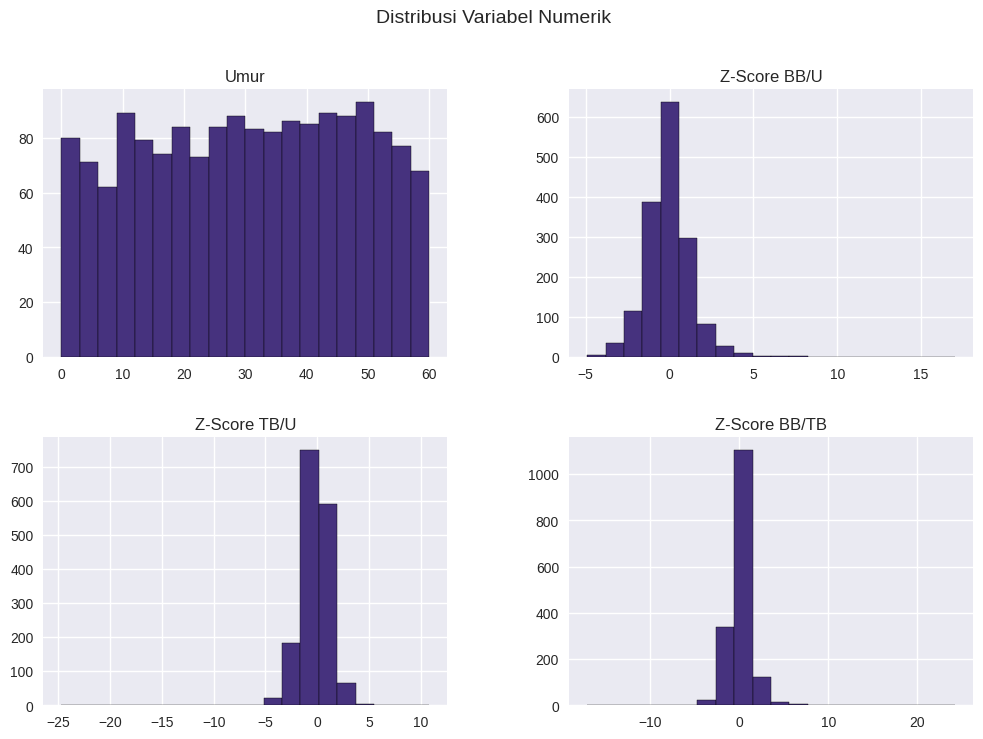

In [21]:
#DISTRIBUSI VARIABEL NUMERIK
numerik_cols = ['Umur', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB']
df[numerik_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

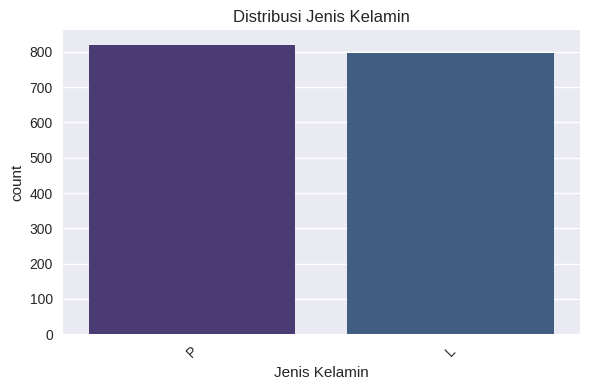

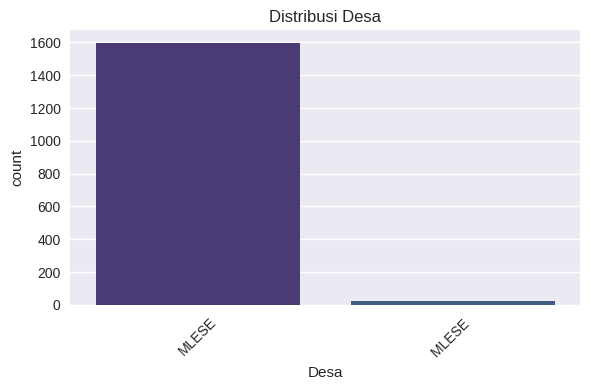

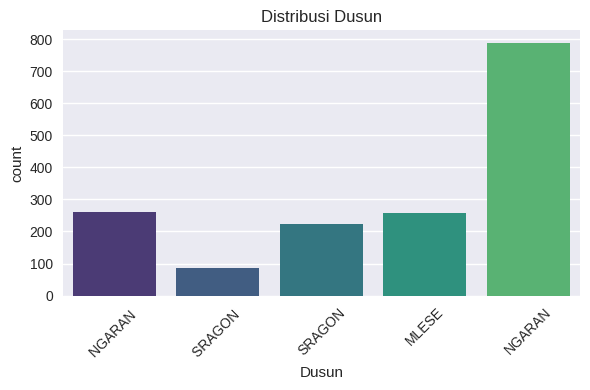

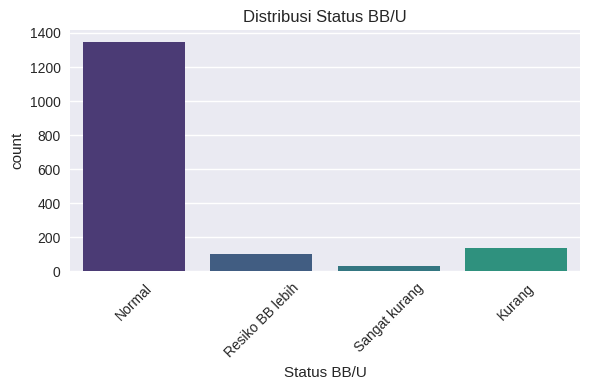

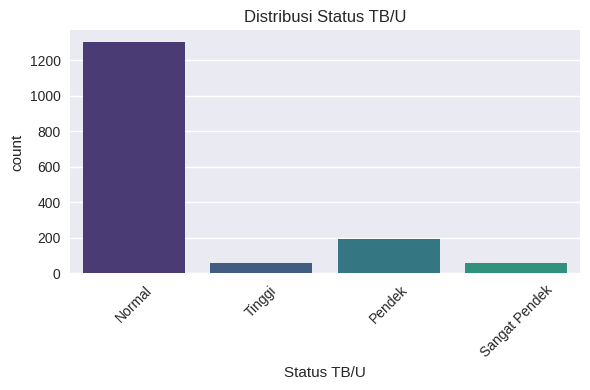

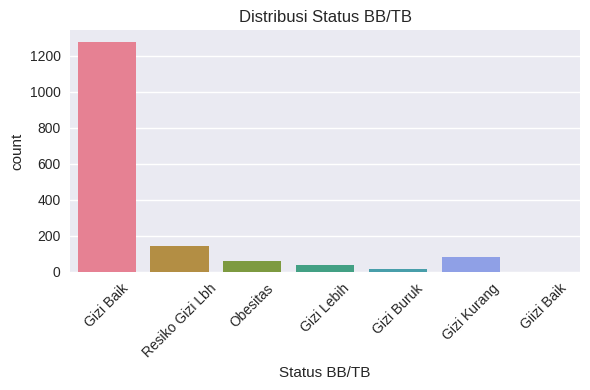

In [22]:
#DISTRIBUSI DATA KATEGORIKAL
kategori_cols = ['Jenis Kelamin', 'Desa', 'Dusun', 'Status BB/U', 'Status TB/U', 'Status BB/TB']
for col in kategori_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, hue=col, legend=False)
        plt.title(f"Distribusi {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

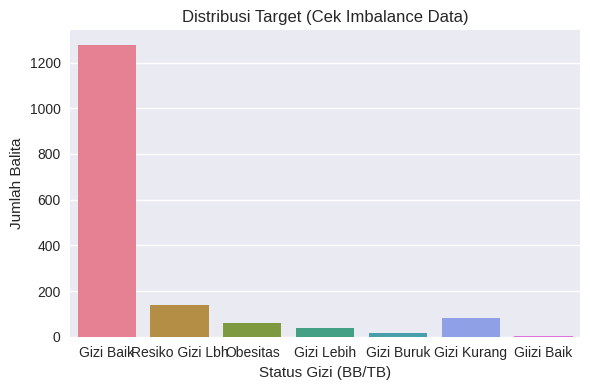

🔍 Distribusi Kelas Target:
Status BB/TB
Gizi Baik          78.97%
Resiko Gizi Lbh     8.72%
Gizi Kurang         5.07%
Obesitas            3.71%
Gizi Lebih          2.35%
Gizi Buruk          1.11%
Giizi Baik          0.06%
Name: proportion, dtype: object


In [23]:
#DISTRIBUSI TARGET VARIABEL (IMBALANCE CEK)
target_col = 'Status BB/TB'  # ubah jika target kamu berbeda
if target_col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=target_col, hue=target_col, legend=False)
    plt.title("Distribusi Target (Cek Imbalance Data)")
    plt.xlabel("Status Gizi (BB/TB)")
    plt.ylabel("Jumlah Balita")
    plt.tight_layout()
    plt.show()

    print("🔍 Distribusi Kelas Target:")
    print(df[target_col].value_counts(normalize=True).apply(lambda x: f"{x*100:.2f}%"))

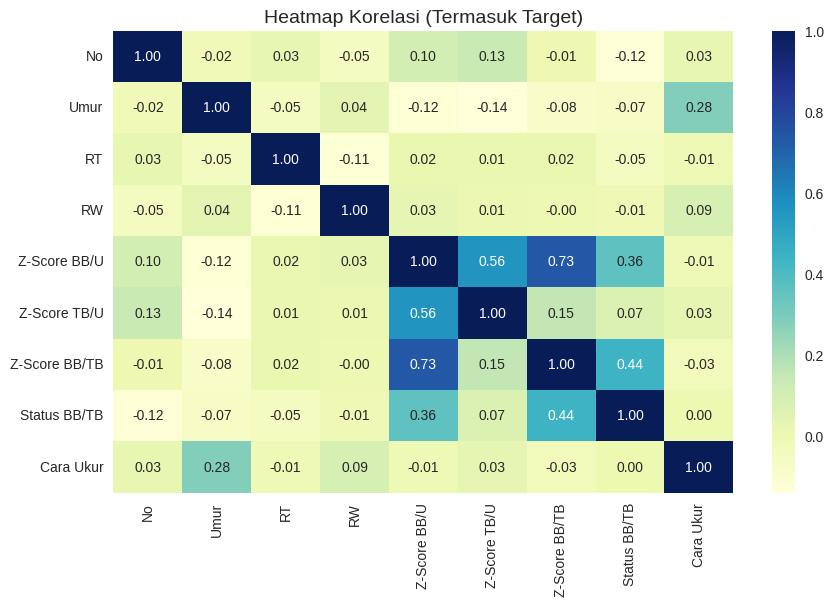

✅ EDA selesai. Siap lanjut ke proses mapping RT/RW → Posyandu.


In [24]:
# =============================================================================
# Korelasi Antar Fitur Numerik dan Target
# =============================================================================

target_col = 'Status BB/TB'  # sesuaikan dengan target utama kamu

if target_col in df.columns:
    df_corr = df.copy()

    # Ubah target menjadi kode numerik agar bisa dihitung korelasinya
    df_corr[target_col] = df_corr[target_col].astype('category').cat.codes

    # Pilih hanya kolom numerik
    numeric_only = df_corr.select_dtypes(include=['number'])

    # Hitung korelasi
    corr_matrix = numeric_only.corr()

    # Visualisasi heatmap korelasi
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt=".2f")
    plt.title("Heatmap Korelasi (Termasuk Target)", fontsize=14)
    plt.show()

print("✅ EDA selesai. Siap lanjut ke proses mapping RT/RW → Posyandu.")


In [25]:
# Kolom numeric yang masih object
kolom_numeric = ['Berat Badan Lahir (Kg)', 'BB', 'TB']

for col in kolom_numeric:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '.', regex=False)                     # ganti koma ke titik
        .str.replace(r'[^0-9\.\-]', '', regex=True)             # hapus huruf/simbol
        .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')           # ubah ke numeric

In [26]:
# Fungsi untuk ambil outlier dengan metode IQR
def cek_outlier(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outliers = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]

    print(f"\n=== Outlier pada kolom '{kolom}' ===")
    if len(outliers) > 0:
        # tampilkan No, Nama Anak, dan nilai kolom
        print(outliers[['No', 'Nama Anak', kolom]].head(10))
    else:
        print("Tidak ada outlier terdeteksi.")
    print(f"Jumlah outlier: {len(outliers)}\n")

    return outliers

# Daftar kolom numeric yang sebaiknya dicek outlier
kolom_numeric = [
    'Berat Badan Lahir (Kg)',  # BBL
    'BB',                       # Berat badan saat pengukuran
    'TB',                       # Tinggi badan saat pengukuran
    'Z-Score BB/U',             # Z-Score BB/U
    'Z-Score TB/U',             # Z-Score TB/U
    'Z-Score BB/TB'             # Z-Score BB/TB
]

# Cek outlier untuk semua kolom penting
for kol in kolom_numeric:
    cek_outlier(df, kol)


=== Outlier pada kolom 'Berat Badan Lahir (Kg)' ===
      No                       Nama Anak  Berat Badan Lahir (Kg)
38    39           MUHAMMAD IHSAN WIBOWO                     4.1
50    51  GAUDENCIA MIRACLE BELLA CHRIST                     3.9
58    59     KAYLA NUNKI NUGRAHAINIMURTI                     3.9
59    60   NABILA ISNAENI PUTRI HUMAIRA                      4.0
71    72        MUHAMMAD ALVITO RAMADHAN                     3.7
80    81                DEWI SEKAR ARUM                      3.7
85    86                GEMILANG ADITAMA                     4.8
142  143           ALIKA PUTRI KINANTHI                      3.8
184  185           MUHAMMAD IHSAN WIBOWO                     4.1
199  200                GEMILANG ADITAMA                     4.8
Jumlah outlier: 112


=== Outlier pada kolom 'BB' ===
      No                     Nama Anak     BB
58    59   KAYLA NUNKI NUGRAHAINIMURTI  24.70
64    65       GABRIEL MARCEL GEOVANI   32.60
255  256          NAYA AGUSTINA PUTRI   

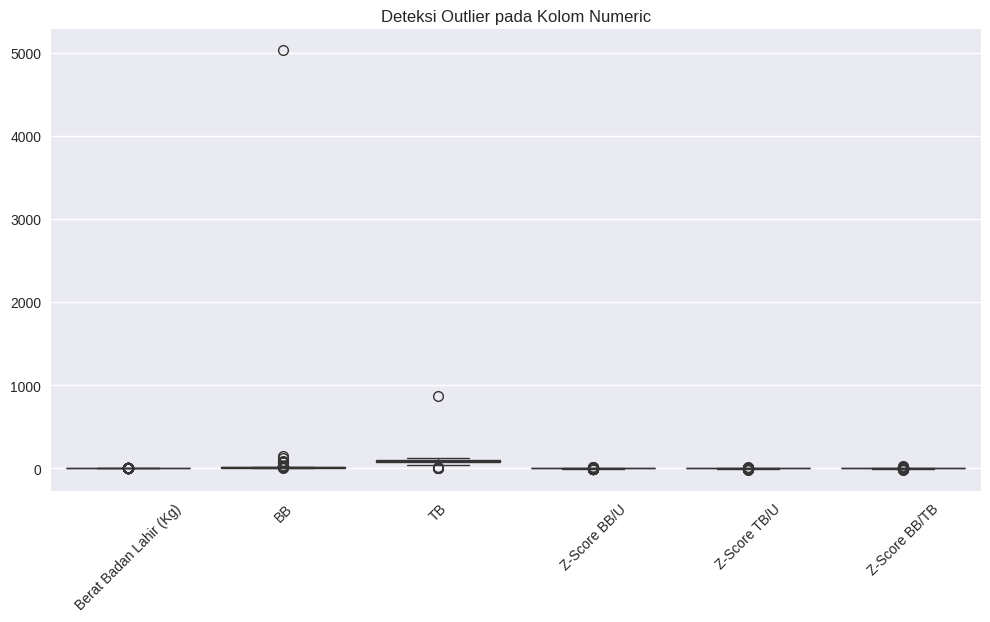

In [27]:
numeric_cols = ['Berat Badan Lahir (Kg)', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Deteksi Outlier pada Kolom Numeric")
plt.show()


# **4. PRE-PROCESSING DATA**

In [28]:
df_processed = df.copy()

- Penanganan missing value

In [29]:
# Perbaikan missing value kolom RT
median_rt = df_processed['RT'].median()
df_processed['RT'].fillna(median_rt, inplace=True)

print("Missing value RT setelah perbaikan:", df_processed['RT'].isna().sum())

Missing value RT setelah perbaikan: 0


In [30]:
# Perbaikan missing value kolom RW
median_rw = df_processed['RW'].median()
df_processed['RW'].fillna(median_rw, inplace=True)

print("Missing value RW setelah perbaikan:", df_processed['RW'].isna().sum())

Missing value RW setelah perbaikan: 0


In [31]:
# Perbaikan missing value kolom Z-Score BB/U
median_zbbu = df_processed['Z-Score BB/U'].median()
df_processed['Z-Score BB/U'].fillna(median_zbbu, inplace=True)

print("Missing value Z-Score BB/U:", df_processed['Z-Score BB/U'].isna().sum())

Missing value Z-Score BB/U: 0


In [32]:
# Perbaikan Missing Value Z-Score TB/U
median_ztbu = df_processed['Z-Score TB/U'].median()
df_processed['Z-Score TB/U'].fillna(median_ztbu, inplace=True)

print("Missing value Z-Score TB/U:", df_processed['Z-Score TB/U'].isna().sum())

Missing value Z-Score TB/U: 0


In [33]:
# Perbaikan Missing Value  Z-Score BB/TB
median_zbbtb = df_processed['Z-Score BB/TB'].median()
df_processed['Z-Score BB/TB'].fillna(median_zbbtb, inplace=True)

print("Missing value Z-Score BB/TB:", df_processed['Z-Score BB/TB'].isna().sum())

Missing value Z-Score BB/TB: 0


In [34]:
# Perbaikan Missing Value — Status TB/U
mode_tbu = df_processed['Status TB/U'].mode()[0]
df_processed['Status TB/U'].fillna(mode_tbu, inplace=True)

print("Missing value Status TB/U:", df_processed['Status TB/U'].isna().sum())

Missing value Status TB/U: 0


In [35]:
# Hasil akhir setelah penanganan missing value ---
print("\nJumlah missing value per kolom (setelah diisi):")
print(df_processed.isnull().sum())
print("\nContoh data setelah proses ini:")
print(df[['RT', 'RW', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status TB/U']].head())


Jumlah missing value per kolom (setelah diisi):
No                        0
Nama Anak                 0
Tanggal Lahir             0
Umur                      0
Jenis Kelamin             0
Berat Badan Lahir (Kg)    0
Nama Ibu                  0
Desa                      0
Dusun                     0
Alamat                    0
RT                        0
RW                        0
Tanggal Pengukuran        0
BB                        0
TB                        0
Z-Score BB/U              0
Z-Score TB/U              0
Z-Score BB/TB             0
Status BB/U               0
Status TB/U               0
Status BB/TB              0
Cara Ukur                 0
dtype: int64

Contoh data setelah proses ini:
    RT   RW  Z-Score BB/U  Z-Score TB/U  Z-Score BB/TB Status TB/U
0  1.0  1.0           0.5          -0.2            0.8      Normal
1  1.0  1.0          -0.8           0.5           -0.6      Normal
2  1.0  1.0          -1.2          -1.0           -0.5      Normal
3  1.0  1.0          

In [36]:
# Merapikan kolom RT/RW
df_processed['RT'] = (
    pd.to_numeric(df_processed['RT'], errors='coerce')
    .fillna(0)
    .astype(int)
    .astype(str)
    .str.zfill(2)
)
df_processed['RW'] = (
    pd.to_numeric(df_processed['RW'], errors='coerce')
    .fillna(0)
    .astype(int)
    .astype(str)
    .str.zfill(2)
)

In [37]:
# Konversi kolom numerik ke float
numerik_cols = ['Berat Badan Lahir (Kg)', 'BB', 'TB',
                'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB']

for col in numerik_cols:
    df_processed[col] = (
        df_processed[col].astype(str)
        .str.replace(',', '.', regex=False)
        .astype(float)
    )

print("✅ Semua kolom numerik sudah dikonversi ke tipe float.")
print(df_processed[numerik_cols].dtypes)

✅ Semua kolom numerik sudah dikonversi ke tipe float.
Berat Badan Lahir (Kg)    float64
BB                        float64
TB                        float64
Z-Score BB/U              float64
Z-Score TB/U              float64
Z-Score BB/TB             float64
dtype: object


In [38]:
def fix_tb(value):
    if pd.isna(value) or value == 0 or value == 875:
        return np.nan
    # Format salah input (nilai terlalu kecil)
    if 0 < value < 20:
        value = value * 10
    # Pastikan TB setelah perbaikan dalam range wajar balita
    if value < 45 or value > 120:
        return np.nan
    return value

# Terapkan perbaikan TB
df_processed['TB'] = df_processed['TB'].apply(fix_tb)

# Imputasi median per umur_bulan agar sesuai tinggi normal anak
df_processed['TB'] = df_processed.groupby('Umur')['TB'].transform(
    lambda x: x.fillna(x.median())
)

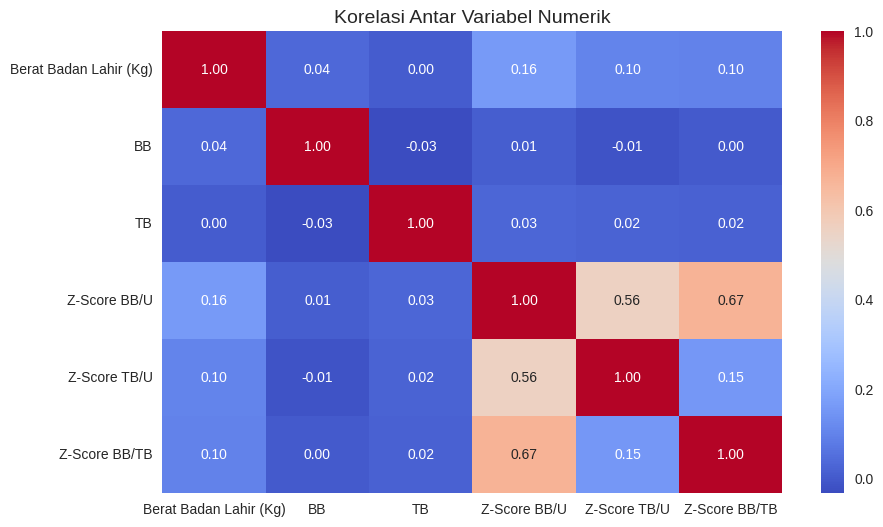

In [39]:
#KORELASI ANTAR VARIABEL NUMERIK
plt.figure(figsize=(10, 6))
corr_matrix = df_processed[numerik_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik", fontsize=14)
plt.show()

In [40]:
# Bersihkan kolom 'Desa' dari spasi dan variasi penulisan
df_processed['Desa'] = df_processed['Desa'].str.strip().str.upper()

# Tampilkan nilai unik setelah pembersihan
print("📋 Nilai unik kolom 'Desa' setelah pembersihan:")
print(df_processed['Desa'].unique())

📋 Nilai unik kolom 'Desa' setelah pembersihan:
['MLESE']


In [41]:
#Perbaikan pada kolom Dusun
# Bersihkan teks kolom 'Dusun'
df_processed['Dusun'] = df_processed['Dusun'].str.strip().str.upper()

# Normalisasi ejaan yang salah
df_processed['Dusun'] = df_processed['Dusun'].replace({
    'SRAGON': 'SRAGON',   # Pastikan ejaan baku
    'SRAGON ': 'SRAGON',  # Hilangkan spasi
    'SRAGONN': 'SRAGON',  # Kalau ada typo
    'NGARAN ': 'NGARAN',  # Hilangkan spasi
    'MLESE ': 'MLESE'     # Pastikan konsisten
})

# Tampilkan nilai unik setelah diperbaiki
print("📋 Nilai unik kolom 'Dusun' setelah perbaikan:")
print(df_processed['Dusun'].unique())


📋 Nilai unik kolom 'Dusun' setelah perbaikan:
['NGARAN' 'SRAGON' 'MLESE']


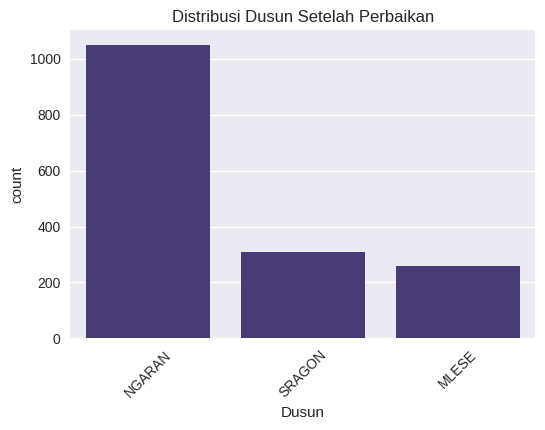

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x='Dusun', data=df_processed)
plt.title('Distribusi Dusun Setelah Perbaikan')
plt.xticks(rotation=45)
plt.show()

- Mapping RT/RW ke nama posyandu
- Encoding kolom posyandu

In [43]:
# Cek apakah kolom RT dan RW ada setelah normalisasi
if 'RT' not in df.columns or 'RW' not in df.columns:
    raise KeyError("Kolom 'RT' dan/atau 'RW' tidak ditemukan di dataset. Cek kembali nama kolom di file Excel!")

In [44]:
# Definisikan fungsi mapping posyandu
def map_posyandu(rt, rw):
    # Pastikan RT dan RW jadi string dua digit (contoh: 1 → '01')
    rt = str(rt).zfill(2)
    rw = str(rw).zfill(2)

    # Larasati 1: RT 01–03 / RW 06
    if rw == '06' and rt in ['01', '02', '03']:
        return 'Larasati 1'

    # Larasati 2: RT 01–02 / RW 04–05
    elif rw in ['04', '05'] and rt in ['01', '02']:
        return 'Larasati 2'

    # Larasati 3: RT 01–03 / RW 02–03
    elif rw in ['02', '03'] and rt in ['01', '02', '03']:
        return 'Larasati 3'

    # Larasati 4: RT 01–03 / RW 01
    elif rw == '01' and rt in ['01', '02', '03']:
        return 'Larasati 4'

    # Larasati 5: RT 01–03 / RW 07
    elif rw == '07' and rt in ['01', '02', '03']:
        return 'Larasati 5'

    # Selain kombinasi di atas
    else:
        return 'Lainnya'

# Terapkan fungsi mapping ke DataFrame
df_processed['Posyandu'] = df_processed.apply(lambda row: map_posyandu(row['RT'], row['RW']), axis=1)

In [45]:
# Cek hasil mapping
print("✅ Kolom 'Posyandu' berhasil dibuat berdasarkan kombinasi RT dan RW .")
print(df_processed[['RT', 'RW', 'Posyandu']].head(10))

✅ Kolom 'Posyandu' berhasil dibuat berdasarkan kombinasi RT dan RW .
   RT  RW    Posyandu
0  01  01  Larasati 4
1  01  01  Larasati 4
2  01  01  Larasati 4
3  01  01  Larasati 4
4  01  02  Larasati 3
5  01  02  Larasati 3
6  02  01  Larasati 4
7  02  01  Larasati 4
8  02  01  Larasati 4
9  02  01  Larasati 4


In [46]:
# =============================================================================
# ENCODING KOLOM 'POSYANDU' (ONE-HOT ENCODING TANPA DROP)
# =============================================================================

# Inisialisasi encoder tanpa drop
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Transform kolom Posyandu
posyandu_encoded = encoder.fit_transform(df_processed[['Posyandu']])

# Ambil nama kolom hasil encoding
encoded_cols = encoder.get_feature_names_out(['Posyandu'])

# Buat DataFrame hasil encoding
df_posyandu_encoded = pd.DataFrame(posyandu_encoded, columns=encoded_cols, index=df_processed.index)

# Gabungkan hasil encoding dengan df_processed
df_processed = pd.concat([df_processed, df_posyandu_encoded], axis=1)

# Hapus kolom aslinya karena sudah digantikan versi numerik
df_processed.drop('Posyandu', axis=1, inplace=True)

print("✅ Kolom 'Posyandu' berhasil di-encode tanpa menghapus kategori apa pun.")
print(df_processed.filter(like='Posyandu').head(10))


✅ Kolom 'Posyandu' berhasil di-encode tanpa menghapus kategori apa pun.
   Posyandu_Larasati 1  Posyandu_Larasati 2  Posyandu_Larasati 3  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  1.0   
5                  0.0                  0.0                  1.0   
6                  0.0                  0.0                  0.0   
7                  0.0                  0.0                  0.0   
8                  0.0                  0.0                  0.0   
9                  0.0                  0.0                  0.0   

   Posyandu_Larasati 4  Posyandu_Larasati 5  
0                  1.0                  0.0  
1                  1.0                  0.0  
2                  1.0                  0

- Encoding kolom Jenis Kelamin

In [47]:
print(df_processed.columns.tolist())

['No', 'Nama Anak', 'Tanggal Lahir', 'Umur', 'Jenis Kelamin', 'Berat Badan Lahir (Kg)', 'Nama Ibu', 'Desa', 'Dusun', 'Alamat', 'RT', 'RW', 'Tanggal Pengukuran', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status BB/U', 'Status TB/U', 'Status BB/TB', 'Cara Ukur', 'Posyandu_Larasati 1', 'Posyandu_Larasati 2', 'Posyandu_Larasati 3', 'Posyandu_Larasati 4', 'Posyandu_Larasati 5']


In [48]:
# Encoding Kolom 'Jenis Kelamin' menggunakan Mapping Encoding
if 'Jenis Kelamin' in df_processed.columns:
    df_processed['Jenis Kelamin'] = df_processed['Jenis Kelamin'].map({'L': 1, 'P': 0})
    print(" Kolom 'Jenis Kelamin' berhasil di-encode (L=1, P=0)")
else:
    print(" Kolom 'Jenis Kelamin' tidak ditemukan dalam dataset.")

# Cek hasil
print(df_processed[['Jenis Kelamin']].head())

 Kolom 'Jenis Kelamin' berhasil di-encode (L=1, P=0)
   Jenis Kelamin
0              0
1              0
2              1
3              1
4              1


- Encoding kolom Dusun

In [49]:
# Encoding kolom "Dusun" dengan menggunakan One Hot Encoding
if 'Dusun' in df_processed.columns:
    # Bersihkan spasi berlebih
    df_processed['Dusun'] = df_processed['Dusun'].astype(str).str.strip()

    # Cek nilai unik
    print(" Nilai unik pada kolom 'Dusun' setelah dibersihkan:")
    print(df_processed['Dusun'].unique())

    # Terapkan One-Hot Encoding
    df_processed = pd.get_dummies(df_processed, columns=['Dusun'], prefix='Dusun')

    print("\n One-Hot Encoding untuk kolom 'Dusun' berhasil dilakukan.")
    print(" Kolom baru hasil encoding:")
    print([col for col in df_processed.columns if 'Dusun_' in col])

    # Contoh hasil encoding
    print("\n Contoh data setelah encoding:")
    print(df_processed.filter(like='Dusun_').head())

else:
    print(" Kolom 'Dusun' tidak ditemukan di dataframe.")

 Nilai unik pada kolom 'Dusun' setelah dibersihkan:
['NGARAN' 'SRAGON' 'MLESE']

 One-Hot Encoding untuk kolom 'Dusun' berhasil dilakukan.
 Kolom baru hasil encoding:
['Dusun_MLESE', 'Dusun_NGARAN', 'Dusun_SRAGON']

 Contoh data setelah encoding:
   Dusun_MLESE  Dusun_NGARAN  Dusun_SRAGON
0        False          True         False
1        False          True         False
2        False          True         False
3        False          True         False
4        False          True         False


- Encoding kolom Status BB/U

In [50]:
# Pastikan kolom ada
if 'Status BB/U' in df_processed.columns:
    print("Nilai unik pada kolom 'Status BB/U':")
    print(df_processed['Status BB/U'].unique())

    print("\nJumlah masing-masing kategori:")
    print(df_processed['Status BB/U'].value_counts())
else:
    print("Kolom 'Status BB/U' tidak ditemukan di dataset.")

Nilai unik pada kolom 'Status BB/U':
['Normal' 'Resiko BB lebih' 'Sangat kurang' 'Kurang']

Jumlah masing-masing kategori:
Status BB/U
Normal             1348
Kurang              138
Resiko BB lebih     100
Sangat kurang        31
Name: count, dtype: int64


In [51]:
# Encoding kolom 'Status BB/U' menggunakan Ordinal Encoding
if 'Status BB/U' in df_processed.columns:
    # 1. Bersihkan teks dari spasi dan variasi penulisan
    df_processed['Status BB/U'] = df_processed['Status BB/U'].str.strip().str.title()

    # 2. Normalisasi istilah yang tidak konsisten
    df_processed['Status BB/U'] = df_processed['Status BB/U'].replace({
        'Resiko Bb Lebih': 'Risiko Gizi Lebih',
        'Risiko Bb Lebih': 'Risiko Gizi Lebih',
        'Resiko Gizi Lbh': 'Risiko Gizi Lebih',
    })

    # 3. Mapping ke ordinal value (sesuai urutan status gizi)
    mapping_status_bbu = {
        'Sangat Kurang': 0,
        'Kurang': 1,
        'Normal': 2,
        'Risiko Gizi Lebih': 3
    }

    # 4. Terapkan mapping
    df_processed['Status BB/U (Encoded)'] = df_processed['Status BB/U'].map(mapping_status_bbu)

    # 5. Tampilkan hasil
    print("Encoding kolom 'Status BB/U' berhasil dilakukan dengan Ordinal Encoding.\n")
    print(df_processed[['Status BB/U', 'Status BB/U (Encoded)']].head())

    # 6. Cek apakah ada nilai yang belum ter-encode
    if df_processed['Status BB/U (Encoded)'].isna().any():
        print("\nAda nilai yang belum ter-encode, berikut nilainya:")
        print(df_processed.loc[df_processed['Status BB/U (Encoded)'].isna(), 'Status BB/U'].unique())

else:
    print("Kolom 'Status BB/U' tidak ditemukan dalam dataset.")

Encoding kolom 'Status BB/U' berhasil dilakukan dengan Ordinal Encoding.

  Status BB/U  Status BB/U (Encoded)
0      Normal                      2
1      Normal                      2
2      Normal                      2
3      Normal                      2
4      Normal                      2


- Encoding kolom Status TB/U

In [52]:
# Cek nilai unik dan jumlah kategori pada kolom 'Status TB/U'

if 'Status TB/U' in df_processed.columns:
    print("Nilai unik pada kolom 'Status TB/U':")
    print(df_processed['Status TB/U'].unique())

    print("\nJumlah masing-masing kategori:")
    print(df_processed['Status TB/U'].value_counts())

Nilai unik pada kolom 'Status TB/U':
['Normal' 'Tinggi' 'Pendek' 'Sangat Pendek']

Jumlah masing-masing kategori:
Status TB/U
Normal           1304
Pendek            192
Sangat Pendek      61
Tinggi             60
Name: count, dtype: int64


In [53]:
#  Encoding kolom 'Status TB/U' menggunakan Ordinal Encoding


if 'Status TB/U' in df_processed.columns:
    # 1. Bersihkan teks dari spasi dan variasi penulisan
    df_processed['Status TB/U'] = df_processed['Status TB/U'].astype(str).str.strip().str.title()

    # 2. Normalisasi istilah (jaga konsistensi)
    df_processed['Status TB/U'] = df_processed['Status TB/U'].replace({
        'Sangat Pendek': 'Sangat Pendek',
        'Pendek': 'Pendek',
        'Normal': 'Normal',
        'Tinggi': 'Tinggi'
    })

    # 3. Mapping urutan ordinal status gizi
    mapping_status_tbu = {
        'Sangat Pendek': 0,
        'Pendek': 1,
        'Normal': 2,
        'Tinggi': 3
    }

    # 4. Terapkan mapping
    df_processed['Status TB/U (Encoded)'] = df_processed['Status TB/U'].map(mapping_status_tbu)

    # 5.  Tampilkan hasil
    print("\nEncoding kolom 'Status TB/U' berhasil dilakukan dengan Ordinal Encoding.")
    print(df_processed[['Status TB/U', 'Status TB/U (Encoded)']].head())

    # 6. Cek apakah ada nilai yang belum ter-encode
    if df_processed['Status TB/U (Encoded)'].isna().any():
        print("\nAda nilai yang belum ter-encode, berikut nilainya:")
        print(df_processed.loc[df_processed['Status TB/U (Encoded)'].isna(), 'Status TB/U'].unique())

else:
    print("Kolom 'Status TB/U' tidak ditemukan dalam dataset.")



Encoding kolom 'Status TB/U' berhasil dilakukan dengan Ordinal Encoding.
  Status TB/U  Status TB/U (Encoded)
0      Normal                      2
1      Normal                      2
2      Normal                      2
3      Normal                      2
4      Normal                      2


- Encoding kolom Status BB/TB

In [54]:
# 1. Pastikan kolom 'Status BB/TB' ada
if 'Status BB/TB' in df_processed.columns:
    # Tampilkan nama kolom target
    print("Nama target kolom:", 'Status BB/TB')

    # 2.  Lihat nilai unik dan jumlah tiap kategori
    print("\nNilai unik pada kolom 'Status BB/TB':")
    print(df_processed['Status BB/TB'].unique())
    print("\nJumlah masing-masing kategori:")
    print(df_processed['Status BB/TB'].value_counts())

Nama target kolom: Status BB/TB

Nilai unik pada kolom 'Status BB/TB':
['Gizi Baik' 'Resiko Gizi Lbh' 'Obesitas' 'Gizi Lebih' 'Gizi Buruk'
 'Gizi Kurang' 'Giizi Baik']

Jumlah masing-masing kategori:
Status BB/TB
Gizi Baik          1277
Resiko Gizi Lbh     141
Gizi Kurang          82
Obesitas             60
Gizi Lebih           38
Gizi Buruk           18
Giizi Baik            1
Name: count, dtype: int64


In [55]:
# 1. Pastikan kolom 'Status BB/TB' ada
if 'Status BB/TB' in df_processed.columns:
    # 2.  Bersihkan teks dari spasi & seragamkan huruf
    df_processed['Status BB/TB'] = df_processed['Status BB/TB'].astype(str).str.strip().str.title()

    #3.  Normalisasi penulisan kategori jika ada yang salah tulis
    df_processed['Status BB/TB'] = df_processed['Status BB/TB'].replace({
        'Giizi Baik': 'Gizi Baik',              # salah ketik → benar
        'Resiko Gizi Lbh': 'Risiko Gizi Lebih', # singkatan → lengkap
        'Resiko Gizi Lebih': 'Risiko Gizi Lebih',
        'Gizi Buruk': 'Gizi Buruk',
        'Gizi Kurang': 'Gizi Kurang',
        'Gizi Baik': 'Gizi Baik',
        'Risiko Gizi Lebih': 'Risiko Gizi Lebih',
        'Gizi Lebih': 'Gizi Lebih',
        'Obesitas': 'Obesitas'
    })

    # 4. Buat mapping Ordinal berdasarkan tingkat gizi (dari terendah → tertinggi)
    mapping_status_bbtb = {
        'Gizi Buruk': 0,
        'Gizi Kurang': 1,
        'Gizi Baik': 2,
        'Risiko Gizi Lebih': 3,
        'Gizi Lebih': 4,
        'Obesitas': 5
    }

    # 5. Terapkan mapping
    df_processed['Status BB/TB (Encoded)'] = df_processed['Status BB/TB'].map(mapping_status_bbtb)

    # 6. Tampilkan hasil encoding
    print("\nEncoding kolom 'Status BB/TB' berhasil dilakukan dengan Ordinal Encoding.\n")
    print(df_processed[['Status BB/TB', 'Status BB/TB (Encoded)']].head())

    # 7. Cek jika ada nilai yang belum ter-encode
    if df_processed['Status BB/TB (Encoded)'].isna().any():
        print("\nAda nilai yang belum ter-encode:")
        print(df_processed.loc[df_processed['Status BB/TB (Encoded)'].isna(), 'Status BB/TB'].unique())

else:
    print(" Kolom 'Status BB/TB' tidak ditemukan dalam dataset.")



Encoding kolom 'Status BB/TB' berhasil dilakukan dengan Ordinal Encoding.

        Status BB/TB  Status BB/TB (Encoded)
0          Gizi Baik                       2
1          Gizi Baik                       2
2          Gizi Baik                       2
3  Risiko Gizi Lebih                       3
4           Obesitas                       5


In [56]:
print("Daftar kolom di dataset kamu:")
print(df_processed.columns.tolist())


Daftar kolom di dataset kamu:
['No', 'Nama Anak', 'Tanggal Lahir', 'Umur', 'Jenis Kelamin', 'Berat Badan Lahir (Kg)', 'Nama Ibu', 'Desa', 'Alamat', 'RT', 'RW', 'Tanggal Pengukuran', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status BB/U', 'Status TB/U', 'Status BB/TB', 'Cara Ukur', 'Posyandu_Larasati 1', 'Posyandu_Larasati 2', 'Posyandu_Larasati 3', 'Posyandu_Larasati 4', 'Posyandu_Larasati 5', 'Dusun_MLESE', 'Dusun_NGARAN', 'Dusun_SRAGON', 'Status BB/U (Encoded)', 'Status TB/U (Encoded)', 'Status BB/TB (Encoded)']


In [57]:
# =============================================================================
# CEK SEMUA KOLOM DALAM DATAFRAME df_processed
# =============================================================================

print("=== Daftar Kolom pada df_processed ===")
for i, col in enumerate(df_processed.columns, start=1):
    print(f"{i}. {col}")

print(f"\nTotal kolom: {len(df_processed.columns)}")


=== Daftar Kolom pada df_processed ===
1. No
2. Nama Anak
3. Tanggal Lahir
4. Umur
5. Jenis Kelamin
6. Berat Badan Lahir (Kg)
7. Nama Ibu
8. Desa
9. Alamat
10. RT
11. RW
12. Tanggal Pengukuran
13. BB
14. TB
15. Z-Score BB/U
16. Z-Score TB/U
17. Z-Score BB/TB
18. Status BB/U
19. Status TB/U
20. Status BB/TB
21. Cara Ukur
22. Posyandu_Larasati 1
23. Posyandu_Larasati 2
24. Posyandu_Larasati 3
25. Posyandu_Larasati 4
26. Posyandu_Larasati 5
27. Dusun_MLESE
28. Dusun_NGARAN
29. Dusun_SRAGON
30. Status BB/U (Encoded)
31. Status TB/U (Encoded)
32. Status BB/TB (Encoded)

Total kolom: 32


In [58]:
# Cek nama kolom dan contoh isi satu baris
print("=== Nama Kolom dan Contoh Isinya ===")
for col in df_processed.columns:
    print(f"{col} → {df_processed[col].iloc[0]}")


=== Nama Kolom dan Contoh Isinya ===
No → 1
Nama Anak → KANISA GENDHIS AMELIA
Tanggal Lahir → 10-01-2019
Umur → 20
Jenis Kelamin → 0
Berat Badan Lahir (Kg) → 2.8
Nama Ibu → ATIKA WINDI HASTINI
Desa → MLESE
Alamat → NGARAN
RT → 01
RW → 01
Tanggal Pengukuran → 23-09-2020
BB → 10.0
TB → 80.0
Z-Score BB/U → 0.5
Z-Score TB/U → -0.2
Z-Score BB/TB → 0.8
Status BB/U → Normal
Status TB/U → Normal
Status BB/TB → Gizi Baik
Cara Ukur → 1
Posyandu_Larasati 1 → 0.0
Posyandu_Larasati 2 → 0.0
Posyandu_Larasati 3 → 0.0
Posyandu_Larasati 4 → 1.0
Posyandu_Larasati 5 → 0.0
Dusun_MLESE → False
Dusun_NGARAN → True
Dusun_SRAGON → False
Status BB/U (Encoded) → 2
Status TB/U (Encoded) → 2
Status BB/TB (Encoded) → 2


In [59]:
# 1. Hitung jumlah kunjungan per anak
frekuensi_kunjungan = df_processed.groupby('Nama Anak').size().reset_index(name='Frekuensi Kunjungan')

# 2. Tampilkan hasil awal
print(" Contoh hasil perhitungan frekuensi kunjungan per anak:")
print(frekuensi_kunjungan.head())

 Contoh hasil perhitungan frekuensi kunjungan per anak:
                        Nama Anak  Frekuensi Kunjungan
0           ABIAN NEVAN A RIYANTO                    6
1              ABID AQILA ABRAHAM                    8
2               ABIDZAR DEWANTARA                   11
3        ABIDZAR GIBRANTARA RASKY                    1
4  ABIZAR GIBRANTARA RASKY ALFAHR                    6


In [60]:
print("\nStatistik deskriptif frekuensi kunjungan:")
print(frekuensi_kunjungan['Frekuensi Kunjungan'].describe())


Statistik deskriptif frekuensi kunjungan:
count    336.000000
mean       4.812500
std        2.653743
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       12.000000
Name: Frekuensi Kunjungan, dtype: float64


In [61]:
# Anak paling sering & paling jarang datang
print("\n👧 Anak paling sering datang ke posyandu:")
print(frekuensi_kunjungan.sort_values('Frekuensi Kunjungan', ascending=False).head(5))

print("\n👶 Anak paling jarang datang ke posyandu:")
print(frekuensi_kunjungan.sort_values('Frekuensi Kunjungan', ascending=True).head(5))


👧 Anak paling sering datang ke posyandu:
                 Nama Anak  Frekuensi Kunjungan
262  NIZAM AHIDQI ARSALAAN                   12
318     UWAIS ZAIDAN FALAH                   11
284      RASYA ANADYA AZKA                   11
281    RAGIL MERIANA PUTRI                   11
149       GEMILANG ADITAMA                   11

👶 Anak paling jarang datang ke posyandu:
                 Nama Anak  Frekuensi Kunjungan
19     AISYAH MARWAH INARA                    1
28     ALIFA PUTRI ARINIKA                    1
30   ALIKA PUTRI KINANTHI                     1
308          SHALIH AQLANI                    1
319     VANIA AQILA PUTRI                     1


In [62]:
print("Sebelum preprocessing:", len(df))
print("Sesudah preprocessing:", len(df_processed))
print("Data yang hilang:", len(df) - len(df_processed))


Sebelum preprocessing: 1617
Sesudah preprocessing: 1617
Data yang hilang: 0


# **5. FEATURE SELECTION**

In [63]:
# Menampilkan semua kolom pada DataFrame
pd.set_option('display.max_columns', None)

# Tampilkan 10 baris pertama (bisa diubah jumlahnya)
print(df_processed.head(10))


   No               Nama Anak Tanggal Lahir  Umur  Jenis Kelamin  \
0   1   KANISA GENDHIS AMELIA    10-01-2019    20              0   
1   2  GHANIA FRADELLA LEENA     30-06-2019    14              0   
2   3  RAYYAN ALFARIZI PUTRA     19-07-2018    26              1   
3   4          FAUZAN ADHIMA     24-11-2017    33              1   
4   5     REXZA ACELIN ATHA A    19-06-2017    39              1   
5   6   NAJWA ALMEERA MADHURI    23-02-2017    43              1   
6   7           AZKA NANDANA     04-09-2016    48              1   
7   8   FIONA YASMINA SAUQIYA    01-05-2016    52              0   
8   9    AZKA FATHIR YULIANTO    04-03-2016    54              1   
9  10       ALFAREZEL NENDR P    13-08-2017    37              0   

   Berat Badan Lahir (Kg)             Nama Ibu   Desa   Alamat  RT  RW  \
0                     2.8  ATIKA WINDI HASTINI  MLESE   NGARAN  01  01   
1                     3.0  RENANI PUJI ASTUTI   MLESE   NGARAN  01  01   
2                     2.7    

In [64]:
# Tentukan kolom target
target_col = 'Status BB/TB (Encoded)'

# Pilih kolom numerik utama
num_cols = ['Umur', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB']

# Tambahkan fitur hasil encoding dan one-hot encoding
encoded_features = [
    'Jenis Kelamin',
    'Status BB/U (Encoded)',
    'Status TB/U (Encoded)',
]

# Gabungkan semua kandidat fitur
feature_candidates = num_cols + encoded_features

In [65]:
# Hitung korelasi terhadap target
corr_matrix = df_processed[feature_candidates + [target_col]].corr()[target_col].sort_values(ascending=False)

print("=== Korelasi Fitur terhadap Target (Status BB/TB) ===")
print(corr_matrix)

=== Korelasi Fitur terhadap Target (Status BB/TB) ===
Status BB/TB (Encoded)    1.000000
Z-Score BB/TB             0.699678
Z-Score BB/U              0.611894
Status BB/U (Encoded)     0.543711
Status TB/U (Encoded)     0.137268
Z-Score TB/U              0.128838
BB                        0.081219
Jenis Kelamin            -0.017071
TB                       -0.020918
Umur                     -0.078965
Name: Status BB/TB (Encoded), dtype: float64


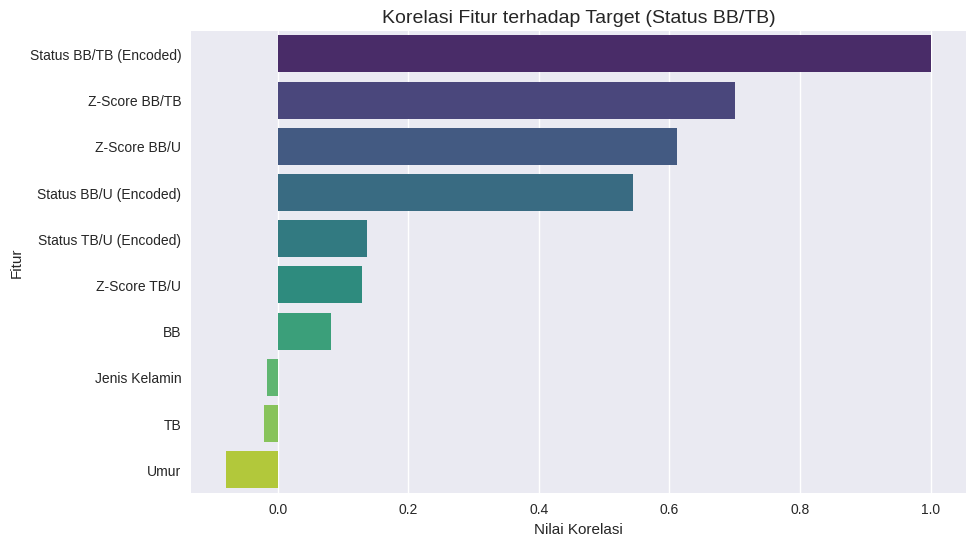

In [66]:
# Visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_matrix.values, y=corr_matrix.index, palette='viridis')
plt.title("Korelasi Fitur terhadap Target (Status BB/TB)", fontsize=14)
plt.xlabel("Nilai Korelasi")
plt.ylabel("Fitur")
plt.show()

In [67]:
# Pilih fitur dengan korelasi cukup signifikan
selected_features_corr = corr_matrix[abs(corr_matrix) > 0.15].index.tolist()
selected_features_corr.remove(target_col)
print("\n✅ Fitur terpilih berdasarkan korelasi:", selected_features_corr)


✅ Fitur terpilih berdasarkan korelasi: ['Z-Score BB/TB', 'Z-Score BB/U', 'Status BB/U (Encoded)']


In [69]:
# -------------------------------
# 5A. Model-based Feature Importance (Random Forest)
# -------------------------------
# Random Forest untuk feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_processed[selected_features_corr], df_processed[target_col])

importances = pd.Series(rf.feature_importances_, index=selected_features_corr).sort_values(ascending=False)
print("\n🔹 Feature Importance dari Random Forest:")
print(importances)

# Pilih fitur dengan importance > 0.01
rf_selected = importances[importances > 0.01].index.tolist()
print("\n✅ Fitur terpilih berdasarkan Random Forest importance:", rf_selected)


🔹 Feature Importance dari Random Forest:
Z-Score BB/TB            0.610328
Z-Score BB/U             0.305128
Status BB/U (Encoded)    0.084544
dtype: float64

✅ Fitur terpilih berdasarkan Random Forest importance: ['Z-Score BB/TB', 'Z-Score BB/U', 'Status BB/U (Encoded)']


In [70]:
# -------------------------------
# 5B. Chi-Square Test (untuk fitur kategori)
# -------------------------------
categorical_features = ['Jenis Kelamin', 'Status BB/U (Encoded)', 'Status TB/U (Encoded)']
X_cat = df_processed[categorical_features]
y_cat = df_processed[target_col]

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_cat, y_cat)

chi2_scores = pd.Series(chi2_selector.scores_, index=categorical_features).sort_values(ascending=False)
print("\n🔹 Chi-square Scores untuk fitur kategori:")
print(chi2_scores)

# Pilih fitur kategori dengan skor > rata-rata
chi2_selected = chi2_scores[chi2_scores > chi2_scores.mean()].index.tolist()
print("\n✅ Fitur terpilih berdasarkan Chi-square:", chi2_selected)


🔹 Chi-square Scores untuk fitur kategori:
Status BB/U (Encoded)    65.512699
Status TB/U (Encoded)     7.417221
Jenis Kelamin             5.823731
dtype: float64

✅ Fitur terpilih berdasarkan Chi-square: ['Status BB/U (Encoded)']


In [71]:
# -------------------------------
# 5C. Recursive Feature Elimination (RFE) dengan Random Forest
# -------------------------------
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                   n_features_to_select=5, step=1)
rfe_selector.fit(df_processed[selected_features_corr], df_processed[target_col])

rfe_selected = pd.Series(rfe_selector.support_, index=selected_features_corr)
print("\n🔹 Fitur terpilih berdasarkan RFE:")
print(rfe_selected[rfe_selected==True].index.tolist())



🔹 Fitur terpilih berdasarkan RFE:
['Z-Score BB/TB', 'Z-Score BB/U', 'Status BB/U (Encoded)']


In [72]:
# 5️⃣ Gabungkan hasil feature selection final
from collections import Counter

# Gabungkan semua fitur dari ketiga metode
all_selected = rf_selected + chi2_selected + rfe_selected[rfe_selected==True].index.tolist()
counter = Counter(all_selected)

# Pilih fitur yang muncul minimal 2 dari 3 metode
selected_features_final = [feat for feat, count in counter.items() if count >= 2]

# Tambahkan Z-Score TB/U manual karena secara domain knowledge penting
if 'Z-Score TB/U' not in selected_features_final:
    selected_features_final.append('Z-Score TB/U')

print("\n✅ Fitur FINAL yang direkomendasikan untuk modeling:", selected_features_final)


✅ Fitur FINAL yang direkomendasikan untuk modeling: ['Z-Score BB/TB', 'Z-Score BB/U', 'Status BB/U (Encoded)', 'Z-Score TB/U']


In [73]:
# Gunakan fitur final untuk X
X = df_processed[selected_features_final]
y = df_processed[target_col]

print("\n✅ Dimensi data FINAL:")
print("X:", X.shape)
print("y:", y.shape)


✅ Dimensi data FINAL:
X: (1617, 4)
y: (1617,)


# **6. PEMBAGIAN DATA (Train-Test Split)**

In [74]:
# Gunakan fitur dan target dari hasil feature selection sebelumnya
X = df_processed[selected_features_final]   # Fitur input
y = df_processed[target_col]          # Target output (Status BB/TB (Encoded))

# Bagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% untuk data uji
    random_state=42,      # Supaya hasil pembagian selalu sama setiap dijalankan
    stratify=y            # Menjaga proporsi kelas target tetap seimbang
)

In [75]:
# Tampilkan hasil pembagian data
print("✅ Data berhasil dibagi menjadi train dan test")
print("Jumlah data latih (X_train):", X_train.shape)
print("Jumlah data uji (X_test):", X_test.shape)
print("Jumlah target latih (y_train):", y_train.shape)
print("Jumlah target uji (y_test):", y_test.shape)

# Cek distribusi kelas (untuk memastikan stratify berhasil)
print("\nDistribusi kelas pada data latih:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi kelas pada data uji:")
print(y_test.value_counts(normalize=True))

✅ Data berhasil dibagi menjadi train dan test
Jumlah data latih (X_train): (1293, 4)
Jumlah data uji (X_test): (324, 4)
Jumlah target latih (y_train): (1293,)
Jumlah target uji (y_test): (324,)

Distribusi kelas pada data latih:
Status BB/TB (Encoded)
2    0.790410
3    0.087394
1    0.051044
5    0.037123
4    0.023202
0    0.010828
Name: proportion, dtype: float64

Distribusi kelas pada data uji:
Status BB/TB (Encoded)
2    0.790123
3    0.086420
1    0.049383
5    0.037037
4    0.024691
0    0.012346
Name: proportion, dtype: float64


# **7. BALANCING DATA (SMOTE)**

In [76]:
# Lihat distribusi awal kelas pada data latih
print("Distribusi awal data latih:", Counter(y_train))

Distribusi awal data latih: Counter({2: 1022, 3: 113, 1: 66, 5: 48, 4: 30, 0: 14})


In [89]:
smote = SMOTE(random_state=42)

# Terapkan oversampling hanya pada data latih
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Lihat distribusi kelas sebelum dan sesudah SMOTE
print("Distribusi awal data latih:", Counter(y_train))
print("Distribusi setelah SMOTE:", Counter(y_train_res))

Distribusi awal data latih: Counter({2: 1022, 3: 113, 1: 66, 5: 48, 4: 30, 0: 14})
Distribusi setelah SMOTE: Counter({2: 1022, 1: 1022, 5: 1022, 3: 1022, 4: 1022, 0: 1022})


In [95]:
# 1. Tentukan strategi sampling (jumlah target per kelas)
sampling_strategy = {
    0: 500,
    1: 650,
    3: 700,
    4: 550,
    5: 600,
    2: 1022
}
# 2. Terapkan SMOTE untuk oversampling
smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=5, random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("\nDistribusi setelah SMOTE:", Counter(y_res))


Distribusi setelah SMOTE: Counter({2: 1022, 3: 700, 1: 650, 5: 600, 4: 550, 0: 500})


In [92]:
# 3. Bersihkan data sintetis yang terlalu dekat dengan mayoritas (TomekLinks)
tomek = TomekLinks(sampling_strategy='auto')
X_bal, y_bal = tomek.fit_resample(X_res, y_res)

print("\nDistribusi setelah TomekLinks:", Counter(y_bal))

print("\nBentuk data latih sebelum balancing:", X_train.shape)
print("Bentuk data latih sesudah balancing :", X_bal.shape)


Distribusi setelah TomekLinks: Counter({2: 972, 3: 796, 1: 776, 5: 741, 0: 650, 4: 637})

Bentuk data latih sebelum balancing: (1293, 4)
Bentuk data latih sesudah balancing : (4572, 4)


# **8. MODELING & HYPERPARAMETER TUNING**

In [96]:
# === Parameter acak untuk tuning Random Forest ===
param_dist = {
    'n_estimators': randint(150, 300),          # jumlah pohon, cukup tinggi biar stabil
    'max_depth': randint(8, 20),               # kontrol kompleksitas model
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(2, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

# === RandomizedSearchCV ===
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                    # jumlah kombinasi acak yang dicoba
    scoring='f1_macro',           # metrik fokus pada keseimbangan antar kelas
    cv=5,                         # stratified k-fold
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# === Latih model hasil tuning dengan data hasil balancing ===
print("🔎 Proses tuning model Random Forest dengan data hasil SMOTE + TomekLinks...")
random_search.fit(X_bal, y_bal)

# === Model terbaik ===
best_rf = random_search.best_estimator_
print("\n✅ Parameter terbaik Random Forest:")
print(random_search.best_params_)


🔎 Proses tuning model Random Forest dengan data hasil SMOTE + TomekLinks...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Parameter terbaik Random Forest:
{'bootstrap': True, 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 285}


# **9. EVALUASI MODEL**

In [97]:
# === Prediksi pada data uji ===
y_pred = best_rf.predict(X_test)

# Beberapa model kadang tidak punya predict_proba (misal setelah pipeline atau param tertentu)
try:
    y_proba = best_rf.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
except Exception as e:
    print(f"Peringatan: Tidak dapat menghitung ROC AUC ({e})")
    roc_auc = float('nan')

# === Evaluasi ===
acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
gmean = geometric_mean_score(y_test, y_pred)

print("\n📊 === HASIL EVALUASI MODEL RANDOM FOREST (SETELAH SMOTE + TUNING) ===")
print(f"Akurasi (Accuracy): {acc*100:.2f}%")
print(f"F1-Score (Macro)  : {f1_macro:.3f}")
print(f"G-Mean            : {gmean:.3f}")
print(f"ROC AUC (Macro)   : {roc_auc:.3f}")

print("\n=== Laporan Klasifikasi (Per Kelas) ===")
print(classification_report(y_test, y_pred, digits=3))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


📊 === HASIL EVALUASI MODEL RANDOM FOREST (SETELAH SMOTE + TUNING) ===
Akurasi (Accuracy): 85.80%
F1-Score (Macro)  : 0.667
G-Mean            : 0.740
ROC AUC (Macro)   : 0.905

=== Laporan Klasifikasi (Per Kelas) ===
              precision    recall  f1-score   support

           0      0.273     0.750     0.400         4
           1      0.455     0.625     0.526        16
           2      0.947     0.898     0.922       256
           3      0.760     0.679     0.717        28
           4      0.625     0.625     0.625         8
           5      0.733     0.917     0.815        12

    accuracy                          0.858       324
   macro avg      0.632     0.749     0.667       324
weighted avg      0.882     0.858     0.867       324


=== Confusion Matrix ===
[[  3   0   1   0   0   0]
 [  3  10   3   0   0   0]
 [  5  12 230   6   2   1]
 [  0   0   7  19   1   1]
 [  0   0   1   0   5   2]
 [  0   0   1   0   0  11]]


<Figure size 800x600 with 0 Axes>

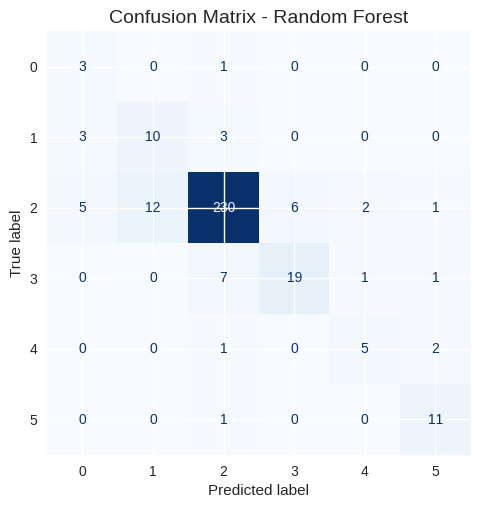

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.show()


# **10. ANALISIS FEATURE IMPORTANCE**

In [99]:
# Model terbaik dari RandomizedSearchCV
model_terbaik = best_rf  # hasil dari random_search.best_estimator_

# Ambil nilai feature importance dari model terbaik
importances = model_terbaik.feature_importances_
feature_names = X.columns  # gunakan nama kolom asli fitur sebelum SMOTE

# Urutkan fitur berdasarkan tingkat pengaruhnya
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

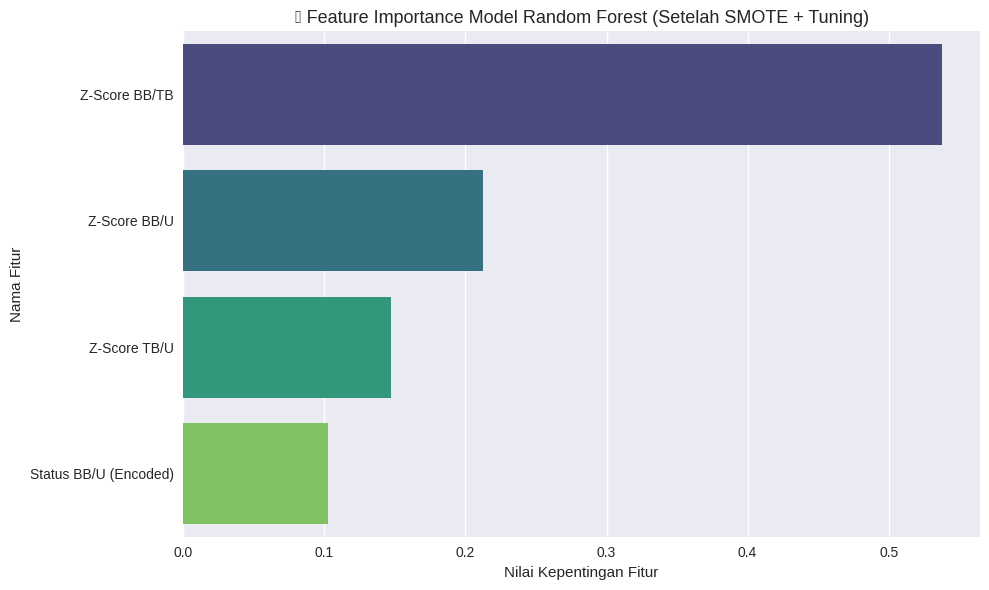

In [100]:
# === 2. Visualisasi Feature Importance ===
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features, palette='viridis')
plt.title("🔍 Feature Importance Model Random Forest (Setelah SMOTE + Tuning)", fontsize=13)
plt.xlabel("Nilai Kepentingan Fitur", fontsize=11)
plt.ylabel("Nama Fitur", fontsize=11)
plt.tight_layout()
plt.show()

In [103]:
# === 3. Tabel Nilai Feature Importance ===
fi_df = pd.DataFrame({
    'Fitur': sorted_features,
    'Tingkat_Pengaruh': sorted_importances
})

print("=== FEATURE IMPORTANCE (Model Random Forest Setelah SMOTE + Tuning) ===")
print(fi_df.to_string(index=False))

=== FEATURE IMPORTANCE (Model Random Forest Setelah SMOTE + Tuning) ===
                Fitur  Tingkat_Pengaruh
        Z-Score BB/TB          0.537822
         Z-Score BB/U          0.212224
         Z-Score TB/U          0.147379
Status BB/U (Encoded)          0.102575


# **11. MENYIMPAN MODEL**

In [105]:
# ============================================================
# 🔖 SIMPAN MODEL RANDOM FOREST HASIL PENELITIAN
# ============================================================

import pickle

# Gabungkan model dan daftar fitur yang digunakan dalam training
bundle = {
    "model": best_rf,                  # model terbaik hasil tuning Random Forest
    "features": X_bal.columns.tolist() # daftar fitur setelah preprocessing & balancing
}

# Simpan model ke file .sav
with open("final_model_klasifikasi_gizi_balita.sav", "wb") as f:
    pickle.dump(bundle, f)

print("✅ Model klasifikasi status gizi balita berhasil disimpan ke file 'final_model_klasifikasi_gizi_balita.sav'!")


✅ Model klasifikasi status gizi balita berhasil disimpan ke file 'final_model_klasifikasi_gizi_balita.sav'!
